In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
import sys
import os
import gseapy as gp
import matplotlib.pyplot as plt
import swan_vis as swan
import yaml
from snakemake.io import expand

p = os.path.dirname(os.path.dirname(os.getcwd()))
sys.path.append(p)

from proc_revisions.utils import *
from proc_revisions.plotting import *

In [2]:
od = '../../proc_revisions/'
config_file = f'{od}/config.yml'
with open(config_file) as f:
    config = yaml.safe_load(f)

In [3]:
pls_file = od+expand(config['ccre']['bed_format'], species='human', ccre_type='pls')[0]
ca_h3_file = od+expand(config['ccre']['bed_format'], species='human', ccre_type='ca_h3k4me3')[0]
cage_file = od+expand(config['cage']['merged'], species='human')[0]
rampage_file = od+expand(config['rampage']['merged'], species='human')[0]
lrgasp_cage_file = od+expand(config['lrgasp_cage']['merged'], species='human')[0]
fantom_file = od+expand(config['fantom']['bed'], species='human')[0]

pas_atlas_file = od+expand(config['polya_atlas']['bed_formatted'], species='human')[0]
pas_file = od+expand(config['pas']['ends_formatted'], species='human', end_mode='tes')[0]

filt_ab = od+expand(config['lr']['cerberus']['filt_ab'], species='human')[0]
cerberus_h5 = od+expand(config['lr']['cerberus']['ca_triplets'], species='human', obs_col='sample')[0]

min_tpm = 1
gene_subset = 'polya'

In [4]:
# def get_bed_lens(bed, source):
#     df = pr.read_bed(bed, as_df=True)
#     df['region_len'] = (df.Start-df.End).abs()
#     return df

In [5]:
sns.set_context('paper', font_scale=2)
mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['pdf.fonttype'] = 42

In [15]:
feat = 'tss'
ca = cerberus.read(cerberus_h5)

ids = get_det_feats(cerberus_h5,
                    filt_ab,
                    feat,
                    how=feat,
                    gene_subset=gene_subset,
                    min_tpm=min_tpm)
if feat == 'tss':
    df = ca.tss.loc[ca.tss.Name.isin(ids)]
elif feat == 'tes':
    df = ca.tes.loc[ca.tes.Name.isin(ids)]
df['source'] = 'ENCODE LR-RNA-seq'

if feat == 'tss':
    source_files = [cage_file,
                    rampage_file,
                    fantom_file,
                    lrgasp_cage_file,
                    pls_file, 
                    ca_h3_file]
    sources_disp = ['CAGE', 'RAMPAGE', 'FANTOM CAGE', 'LRGASP CAGE', 'ENCODE PLS cCREs', 'ENCODE CA-H3K4me3 cCREs']
elif feat == 'tes':
    source_files = [pas_atlas_file, pas_file]
    sources_disp = ['PolyASite Atlas', 'PAS-seq']
for f, sd in zip(source_files, sources_disp):
    temp = pr.read_bed(f, as_df=True)
    temp['source'] = sd
    df = pd.concat([df, temp], axis=0)
    
df['region_len'] = (df.Start-df.End).abs()
print(f'Min LR-RNA-seq region length {df.loc[df.source=="ENCODE LR-RNA-seq"].region_len.min(axis=0)}')

# for f in [pls_file, ca_h3_file, cage_file,
#           rampage_file, lrgasp_cage_file, fantom_file]:
#     temp = get_bed_lens(f)
#     df = pd.concat([df, temp], axis=0)
    

Calculating tss TPM values
Subsetting for polya genes


/Users/fairliereese/Documents/programming/mortazavi_lab/data/paper_rnawg/proc_revisions/utils.py:2110: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tpm_col] = (df[d]*1000000)/df[total_col]
/Users/fairliereese/Documents/programming/mortazavi_lab/data/paper_rnawg/proc_revisions/utils.py:2109: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[total_col] = df[d].sum()


Enforcing minimum TPM
Total # tsss detected: 73812
# tsss >= 1 tpm: 64913
Applying gene type and novelty subset
Number of tsss reported: 61664
Min LR-RNA-seq region length 101


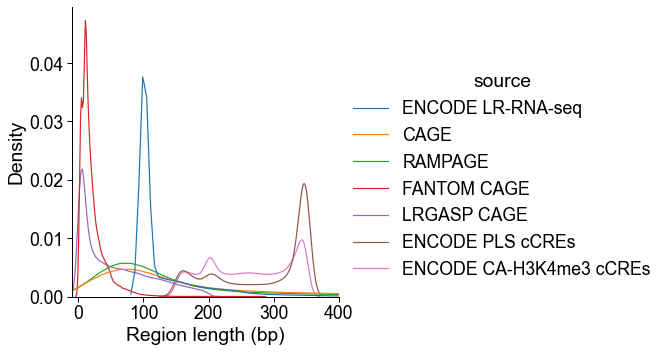

In [16]:
ax = sns.displot(data=df, x='region_len', hue='source', kind='kde', common_norm=False)
ax.set(xlim=(-10, 400), xlabel='Region length (bp)')
fname = 'figures/tss_sizes.pdf'
plt.savefig(fname, dpi=500)

In [13]:
feat = 'tes'
ca = cerberus.read(cerberus_h5)

ids = get_det_feats(cerberus_h5,
                    filt_ab,
                    feat,
                    how=feat,
                    gene_subset=gene_subset,
                    min_tpm=min_tpm)
if feat == 'tss':
    df = ca.tss.loc[ca.tss.Name.isin(ids)]
elif feat == 'tes':
    df = ca.tes.loc[ca.tes.Name.isin(ids)]
df['source'] = 'ENCODE LR-RNA-seq'

if feat == 'tss':
    source_files = [cage_file,
                    rampage_file,
                    fantom_file,
                    lrgasp_cage_file,
                    pls_file, 
                    ca_h3_file]
    sources_disp = ['CAGE', 'RAMPAGE', 'FANTOM CAGE', 'LRGASP CAGE', 'ENCODE PLS cCREs', 'ENCODE CA-H3K4me3 cCREs']
elif feat == 'tes':
    source_files = [pas_atlas_file, pas_file]
    sources_disp = ['PolyASite Atlas', 'PAS-seq']
for f, sd in zip(source_files, sources_disp):
    temp = pr.read_bed(f, as_df=True)
    temp['source'] = sd
    df = pd.concat([df, temp], axis=0)
    
df['region_len'] = (df.Start-df.End).abs()
print(f'Min LR-RNA-seq region length {df.loc[df.source=="ENCODE LR-RNA-seq"].region_len.min(axis=0)}')

# for f in [pls_file, ca_h3_file, cage_file,
#           rampage_file, lrgasp_cage_file, fantom_file]:
#     temp = get_bed_lens(f)
#     df = pd.concat([df, temp], axis=0)


Calculating tes TPM values
Subsetting for polya genes


/Users/fairliereese/Documents/programming/mortazavi_lab/data/paper_rnawg/proc_revisions/utils.py:2110: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tpm_col] = (df[d]*1000000)/df[total_col]
/Users/fairliereese/Documents/programming/mortazavi_lab/data/paper_rnawg/proc_revisions/utils.py:2109: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[total_col] = df[d].sum()


Enforcing minimum TPM
Total # tess detected: 87189
# tess >= 1 tpm: 76035
Applying gene type and novelty subset
Number of tess reported: 72806
Min LR-RNA-seq region length 101


<Figure size 432x288 with 0 Axes>

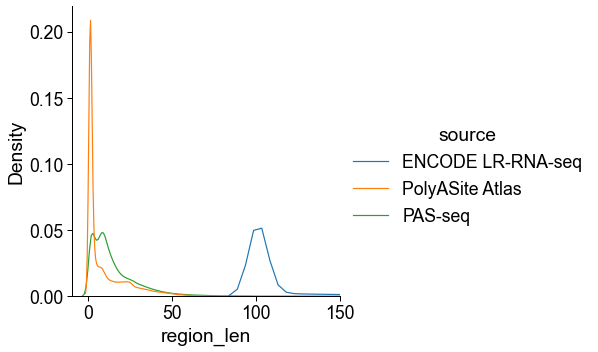

In [14]:
ax = sns.displot(data=df, x='region_len', hue='source', kind='kde', common_norm=False)
ax.set(xlim=(-10, 150))
fname = 'figures/tes_sizes.pdf'
plt.savefig(fname, dpi=500)

In [13]:
def plot_region_len(bed, title):
    df = pr.read_bed(bed, as_df=True)
    df['region_len'] = (df.Start-df.End).abs()
    ax = sns.displot(data=df, x='region_len')   
    ax.set(title=title)

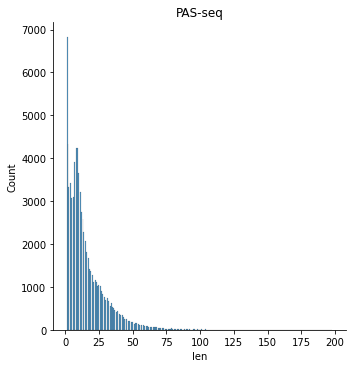

In [26]:
plot_region_len(pas_file, 'PAS-seq')

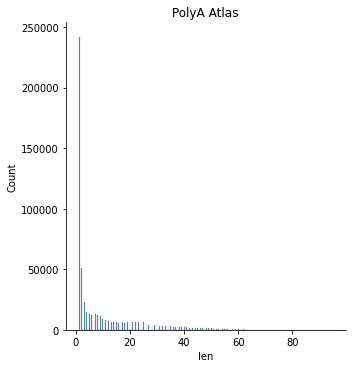

In [24]:
plot_region_len(pas_atlas_file, 'PolyA Atlas')

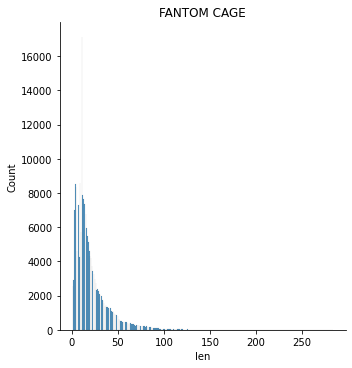

In [23]:
plot_region_len(fantom_file, 'FANTOM CAGE')

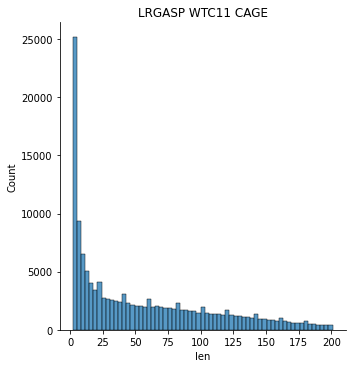

In [22]:
plot_region_len(lrgasp_cage_file, 'LRGASP WTC11 CAGE')

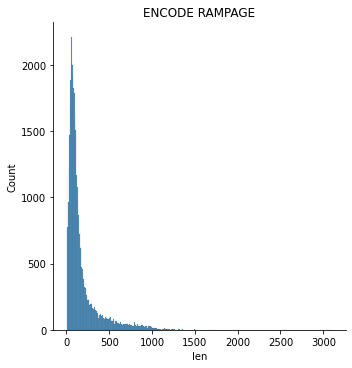

In [20]:
plot_region_len(rampage_file, 'ENCODE RAMPAGE')

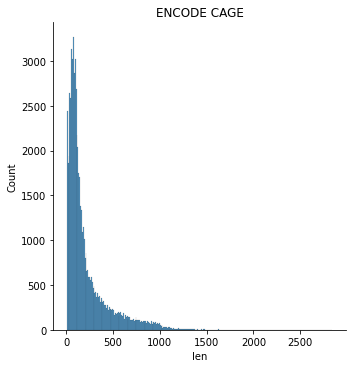

In [19]:
plot_region_len(cage_file, 'ENCODE CAGE')

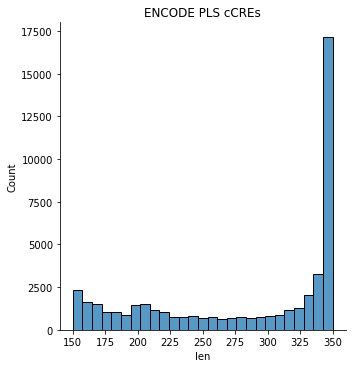

In [15]:
plot_region_len(pls_file, 'ENCODE PLS cCREs')

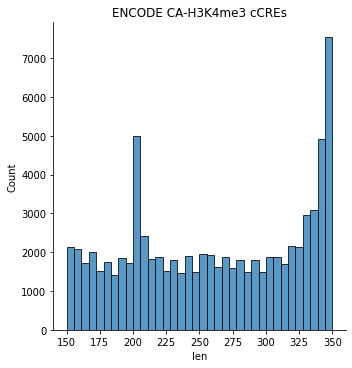

In [16]:
plot_region_len(ca_h3_file, 'ENCODE CA-H3K4me3 cCREs')